# Importing DeepLearning Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras

# Fetch and load the dataset

In [4]:
from tensorflow.keras.datasets import mnist
( X_train , y_train ) , (X_test , y_test)= mnist.load_data()


In [5]:
print(X_train.shape , y_train.shape)

(60000, 28, 28) (60000,)


In [6]:
print(X_test.shape , y_test.shape)

(10000, 28, 28) (10000,)


In [7]:
print(X_train.dtype , y_train.dtype , X_test.dtype , y_test.dtype)

uint8 uint8 uint8 uint8


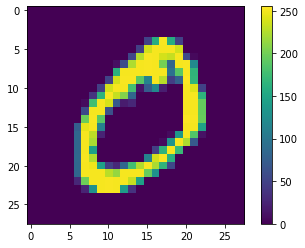

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig= plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.show()

# Create a Validation dataset

In [10]:
X_valid , X_train = X_train[:5000] , X_train[5000:]
y_valid , y_train = y_train[:5000] , y_train[5000:]

In [11]:
print(X_valid.shape , y_valid.shape)

(5000, 28, 28) (5000,)


In [12]:
print(X_train.shape , y_train.shape)

(55000, 28, 28) (55000,)


# Normalization the pixel intensity value

In [45]:
X_train_image = X_train/255.0
X_test_image = X_test/255.0
X_valid_image = X_valid/255.0

In [15]:
class_names =["0" , "1" , "2" , "3" , "4" , "5" , "6" , "7" , "8" , "9"]

# Plot the first 25 Digits

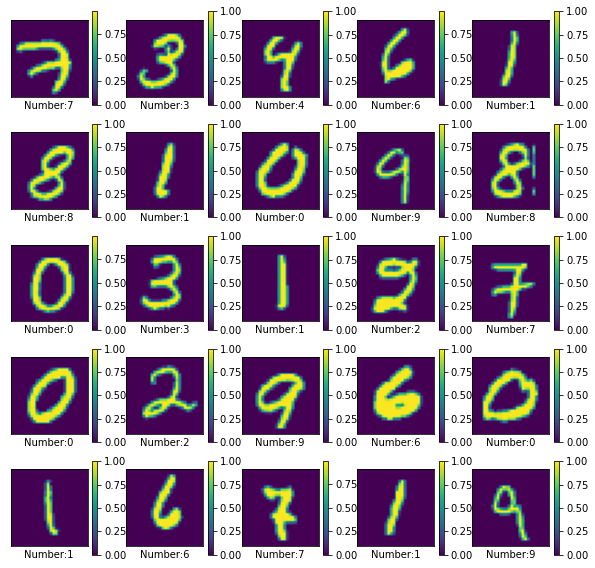

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(10  , 10))
for i in range(25):
    plt.subplot(5 , 5 , i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_train_image[i])
    plt.colorbar()
    plt.xlabel("Number:"+class_names[y_train[i]])

# Creating the sequential API

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
model1= Sequential()
model1.add(Flatten(input_shape=[28 , 28]))
model1.add(Dense(300 , activation = activations.relu))
model1.add(Dense(100 , activation = activations.relu))
model1.add(Dense(10 , activation = activations.softmax))

In [20]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=[28 , 28]),
    keras.layers.Dense(300 , activation='relu'),
    keras.layers.Dense(100  , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'softmax')
    
])

# Model summary

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# Names of the layers and get weights

In [24]:
model.layers

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [26]:
weights , biases= hidden1.get_weights()

In [27]:
print(weights.shape)

(784, 300)


In [28]:
print(weights)

[[-0.00479967  0.03896888  0.03431182 ...  0.03018646  0.03034099
   0.02331191]
 [-0.01868621 -0.07110614  0.04351986 ...  0.0404245  -0.06667081
   0.07382528]
 [-0.04452201 -0.03171516  0.03150991 ... -0.04867687 -0.0374223
  -0.07125033]
 ...
 [ 0.02287809  0.02693502 -0.02462232 ... -0.0257869  -0.02273392
  -0.07159045]
 [-0.05301974  0.00335925 -0.03426109 ... -0.06331309 -0.01961372
  -0.06271969]
 [-0.05458773  0.03972691 -0.04860292 ... -0.06359927 -0.02508248
  -0.01534   ]]


In [29]:
print(biases.shape)

(300,)


In [30]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# For the second layer

In [32]:
hidden2= model.layers[2]
hidden2.name

'dense_4'

In [33]:
weights , biases= hidden2.get_weights()


In [34]:
print(weights.shape , biases.shape)

(300, 100) (100,)


In [35]:
print(weights)

[[-0.06033145  0.07310358  0.02660231 ...  0.12138111 -0.11114192
   0.05517641]
 [ 0.05123974  0.07334665  0.08218472 ... -0.11642914  0.10085446
   0.09506696]
 [-0.08720459 -0.06288913  0.06330692 ...  0.10972594 -0.09053096
   0.00117142]
 ...
 [ 0.06856985  0.03433303  0.11951254 ... -0.11429443  0.12137083
  -0.10940304]
 [ 0.08230322  0.02374577 -0.03066397 ... -0.03219754 -0.07284196
   0.02753424]
 [ 0.05096885 -0.06123654  0.10108946 ...  0.04346832 -0.03882288
   0.1190811 ]]


In [36]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# Compile the model 

In [37]:

model.compile(loss = keras.losses.sparse_categorical_crossentropy , optimizer = keras.optimizers.SGD() , metrics=[keras.metrics.sparse_categorical_accuracy])

# Training and Evaluating the model 

In [38]:

history = model.fit(X_train_image , y_train , epochs=30 , validation_data=(X_valid_image , y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6166 - sparse_categorical_accuracy: 0.8393 - val_loss: 0.3028 - val_sparse_categorical_accuracy: 0.9190
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2865 - sparse_categorical_accuracy: 0.9174 - val_loss: 0.2361 - val_sparse_categorical_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2325 - sparse_categorical_accuracy: 0.9340 - val_loss: 0.1986 - val_sparse_categorical_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1985 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.1775 - val_sparse_categorical_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1729 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.1592 - val_sparse_categorical_accuracy: 0.9558
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1532 - spars

In [39]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
history.epoch


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [43]:
history.history

{'loss': [0.6166309714317322,
  0.28653857111930847,
  0.2325126975774765,
  0.19850699603557587,
  0.17287009954452515,
  0.15316718816757202,
  0.13755600154399872,
  0.12444791942834854,
  0.11350934952497482,
  0.10402683168649673,
  0.09547871351242065,
  0.08806205540895462,
  0.08180246502161026,
  0.07587405294179916,
  0.07057084888219833,
  0.06585251539945602,
  0.061527904123067856,
  0.05766303092241287,
  0.053915880620479584,
  0.05023671314120293,
  0.04749998077750206,
  0.04431651160120964,
  0.041789066046476364,
  0.03933762386441231,
  0.036977484822273254,
  0.03477532044053078,
  0.032582931220531464,
  0.030839070677757263,
  0.029199469834566116,
  0.02754308469593525],
 'sparse_categorical_accuracy': [0.8393272757530212,
  0.9173636436462402,
  0.934036374092102,
  0.9444000124931335,
  0.9516545534133911,
  0.956745445728302,
  0.9611091017723083,
  0.9646909236907959,
  0.968218207359314,
  0.9711272716522217,
  0.9733454585075378,
  0.9760727286338806,
  0.

# Evaluation of the model 

In [46]:
model.evaluate(X_test_image , y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0691 - sparse_categorical_accuracy: 0.9791


[0.06913425028324127, 0.9790999889373779]

In [52]:
X_new = X_test_image[:3]
y_pred_proba= model.predict(X_new)
y_pred_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
y_new= y_test[:3]
print(y_new)

[7 2 1]


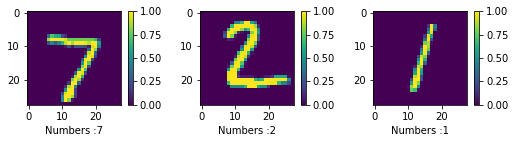

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

fig= plt.figure(figsize=(15 , 10))
for i in range(3):
    plt.subplot(5 , 5 , i+1)
    plt.imshow(X_new[i])
    plt.xlabel("Numbers :"+class_names[y_test[i]])
    plt.colorbar()